In [23]:
import pandas as pd
import numpy as np

In [24]:
dataframe=pd.read_csv("daily-total-female-births-CA.xls")

In [25]:
dataframe.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [26]:
dataframe['date'].dtype

dtype('O')

In [27]:
df2=pd.read_csv(r"daily-total-female-births-CA.xls",header=0,parse_dates=[0])

In [28]:
df2.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [29]:
df2['date'].dtype

dtype('<M8[ns]')

In [30]:
series=pd.read_csv(r"daily-total-female-births-CA.xls",header=0,parse_dates=[0],index_col=0).squeeze("columns")

In [31]:
series.head()

date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: births, dtype: int64

In [32]:
series.shape

(365,)

In [33]:
df2.shape

(365, 2)

In [34]:
print(series['1959-01'])

date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
1959-01-06    29
1959-01-07    45
1959-01-08    43
1959-01-09    38
1959-01-10    27
1959-01-11    38
1959-01-12    33
1959-01-13    55
1959-01-14    47
1959-01-15    45
1959-01-16    37
1959-01-17    50
1959-01-18    43
1959-01-19    41
1959-01-20    52
1959-01-21    34
1959-01-22    53
1959-01-23    39
1959-01-24    32
1959-01-25    37
1959-01-26    43
1959-01-27    39
1959-01-28    35
1959-01-29    44
1959-01-30    38
1959-01-31    24
Name: births, dtype: int64


In [35]:
df2[(df2['date']>'1959-01-01') & (df2['date'] <= '1959-01-21')]

,date,births
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
5,1959-01-06,29
6,1959-01-07,45
7,1959-01-08,43
8,1959-01-09,38
9,1959-01-10,27
10,1959-01-11,38


In [36]:
series.describe()

count    365.000000
mean      41.980822
std        7.348257
min       23.000000
25%       37.000000
50%       42.000000
75%       46.000000
max       73.000000
Name: births, dtype: float64

In [37]:
df2.describe()

,date,births
count,365,365.000000
mean,1959-07-02 00:00:00,41.980822
min,1959-01-01 00:00:00,23.000000
25%,1959-04-02 00:00:00,37.000000
50%,1959-07-02 00:00:00,42.000000
75%,1959-10-01 00:00:00,46.000000
max,1959-12-31 00:00:00,73.000000
std,NaN,7.348257


In [38]:
df2.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [39]:
features=df2.copy()

In [40]:
features['year']=df2['date'].dt.year

In [41]:
features['month']=df2['date'].dt.month

In [42]:
features['day']=df2['date'].dt.day

In [43]:
features.head(5)

,date,births,year,month,day
0,1959-01-01,35,1959,1,1
1,1959-01-02,32,1959,1,2
2,1959-01-03,30,1959,1,3
3,1959-01-04,31,1959,1,4
4,1959-01-05,44,1959,1,5


In [48]:
# Lag features

In [49]:
features['lag2'] = df2['births'].shift(2)

In [50]:
features['lag2'] = df2['births'].shift(365)

In [51]:
features.head(7)

,date,births,year,month,day,lag2
0,1959-01-01,35,1959,1,1,NaN
1,1959-01-02,32,1959,1,2,NaN
2,1959-01-03,30,1959,1,3,NaN
3,1959-01-04,31,1959,1,4,NaN
4,1959-01-05,44,1959,1,5,NaN
5,1959-01-06,29,1959,1,6,NaN
6,1959-01-07,45,1959,1,7,NaN


In [52]:
features['Roll_mean']=df2['births'].rolling(window=2).mean()

In [53]:
features.head(5)

,date,births,year,month,day,lag2,Roll_mean
0,1959-01-01,35,1959,1,1,NaN,NaN
1,1959-01-02,32,1959,1,2,NaN,33.5
2,1959-01-03,30,1959,1,3,NaN,31.0
3,1959-01-04,31,1959,1,4,NaN,30.5
4,1959-01-05,44,1959,1,5,NaN,37.5


In [54]:
features['Roll_mean']=df2['births'].rolling(window=2).max()

In [57]:
features.head(5)

,date,births,year,month,day,lag2,Roll_mean
0,1959-01-01,35,1959,1,1,NaN,NaN
1,1959-01-02,32,1959,1,2,NaN,35.0
2,1959-01-03,30,1959,1,3,NaN,32.0
3,1959-01-04,31,1959,1,4,NaN,31.0
4,1959-01-05,44,1959,1,5,NaN,44.0


In [58]:
# Expanding features

In [59]:
features['Expand_max'] = df2['births'].expanding().max()

In [60]:
features.head(10)

,date,births,year,month,day,lag2,Roll_mean,Expand_max
0,1959-01-01,35,1959,1,1,NaN,NaN,35.0
1,1959-01-02,32,1959,1,2,NaN,35.0,35.0
2,1959-01-03,30,1959,1,3,NaN,32.0,35.0
3,1959-01-04,31,1959,1,4,NaN,31.0,35.0
4,1959-01-05,44,1959,1,5,NaN,44.0,44.0
5,1959-01-06,29,1959,1,6,NaN,44.0,44.0
6,1959-01-07,45,1959,1,7,NaN,45.0,45.0
7,1959-01-08,43,1959,1,8,NaN,45.0,45.0
8,1959-01-09,38,1959,1,9,NaN,43.0,45.0
9,1959-01-10,27,1959,1,10,NaN,38.0,45.0


In [61]:
# pandas.pydata see documentation

### Downsampling and Upsampling

In [62]:
miles_df = pd.read_csv('us-airlines-monthly-aircraft-miles-flown.csv',header=0,parse_dates=[0])

In [63]:
miles_df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


### Downsampling

In [64]:
quartely_miles_df = miles_df.resample('QE', on='Month').mean()

In [67]:
quartely_miles_df.head()

,MilesMM
Month,
1963-03-31,6696.333333
1963-06-30,8756.000000
1963-09-30,10392.333333
1963-12-31,7356.333333
1964-03-31,7287.666667


In [77]:
yearly_total_miles_df = miles_df.resample('YE', on='Month').sum()

# If error then use Y

In [78]:
yearly_total_miles_df.head()

,MilesMM
Month,
1963-12-31,99603
1964-12-31,106192
1965-12-31,115431
1966-12-31,119154
1967-12-31,126515


### upsampling

In [80]:
upsampled_miles_df = miles_df.resample('D', on='Month').mean()

In [88]:
upsampled_miles_df.head(35)

,MilesMM
Month,
1963-01-01,6827.0
1963-01-02,NaN
1963-01-03,NaN
1963-01-04,NaN
1963-01-05,NaN
1963-01-06,NaN
1963-01-07,NaN
1963-01-08,NaN
1963-01-09,NaN


In [82]:
interpolated_miles_df = upsampled_miles_df.interpolate(methon='linear')

# Interpolation: estimating the missing value bt 2 points using the linear line

In [85]:
interpolated_miles_df.head(32)

# 1 jan to 1 feb
# inke between hmne ek linear line draw kiya.
# and then we have find the values between all the data points.

,MilesMM
Month,
1963-01-01,6827.000000
1963-01-02,6806.064516
1963-01-03,6785.129032
1963-01-04,6764.193548
1963-01-05,6743.258065
1963-01-06,6722.322581
1963-01-07,6701.387097
1963-01-08,6680.451613
1963-01-09,6659.516129


### Time Series - Data Visualization

In [89]:
from matplotlib import pyplot as plt
%matplotlib inline

In [90]:
Dataviz_df = df2.copy()

In [91]:
Dataviz_df.head(10)

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
5,1959-01-06,29
6,1959-01-07,45
7,1959-01-08,43
8,1959-01-09,38
9,1959-01-10,27


<Axes: >

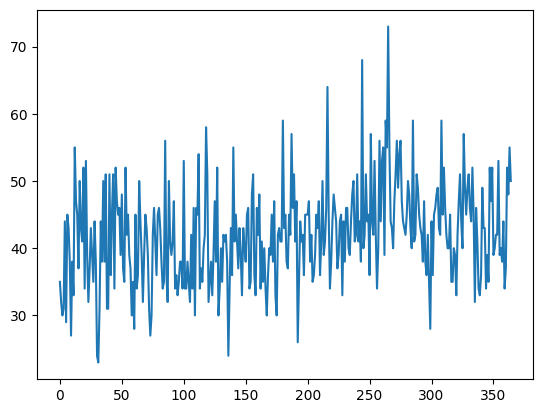

In [100]:
Dataviz_df['births'].plot()

In [ ]:
Dataviz_df.index = Dataviz_df['date']

In [107]:
# // mycode
Dataviz_df.index = Dataviz_df['date']
Dataviz_df.index

DatetimeIndex(['1959-01-01', '1959-01-02', '1959-01-03', '1959-01-04',
               '1959-01-05', '1959-01-06', '1959-01-07', '1959-01-08',
               '1959-01-09', '1959-01-10',
               ...
               '1959-12-22', '1959-12-23', '1959-12-24', '1959-12-25',
               '1959-12-26', '1959-12-27', '1959-12-28', '1959-12-29',
               '1959-12-30', '1959-12-31'],
              dtype='datetime64[ns]', name='date', length=365, freq=None)

<Axes: xlabel='date'>

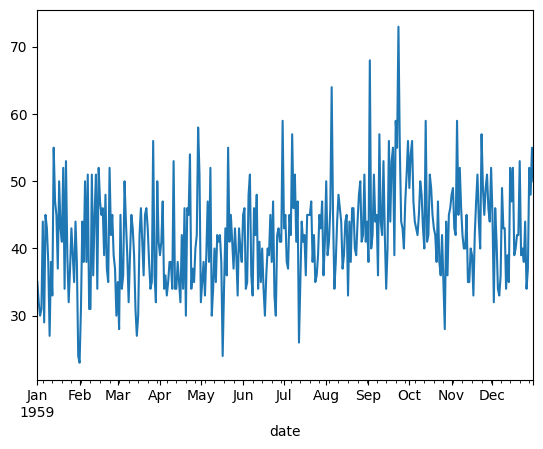

In [108]:
Dataviz_df['births'].plot()

### Zomming in 

In [130]:
Dataviz_df2 = Dataviz_df[(Dataviz_df['date'] >= '1959-01-01') & (Dataviz_df['date'] <= '1959-01-10')].copy()

In [131]:
Dataviz_df2

,date,births
date,,
1959-01-01,1959-01-01,35
1959-01-02,1959-01-02,32
1959-01-03,1959-01-03,30
1959-01-04,1959-01-04,31
1959-01-05,1959-01-05,44
1959-01-06,1959-01-06,29
1959-01-07,1959-01-07,45
1959-01-08,1959-01-08,43
1959-01-09,1959-01-09,38


<Axes: xlabel='date'>

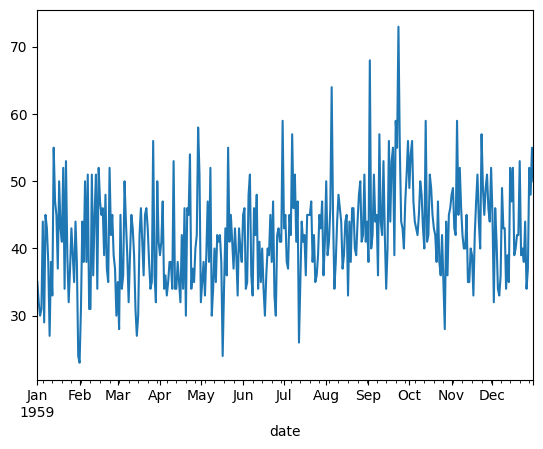

In [121]:
Dataviz_df['births'].plot()

### Trendline

In [112]:
import seaborn as sns

<Axes: ylabel='births'>

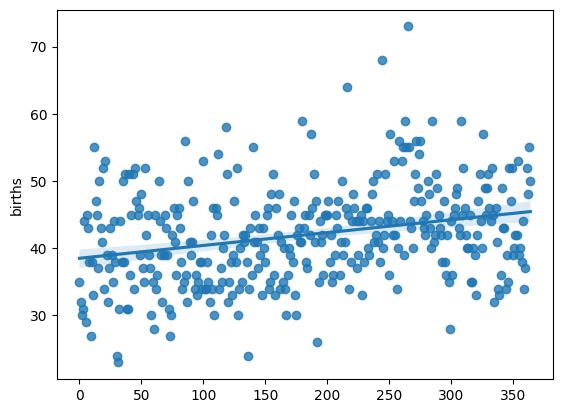

In [113]:
sns.regplot(x = df2.index.values, y=df2['births'])

<Axes: ylabel='births'>

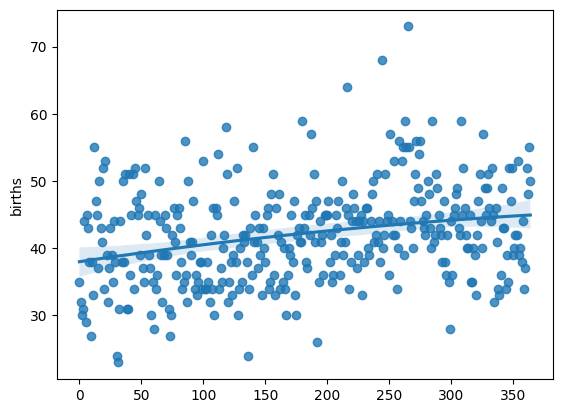

In [128]:
sns.regplot(x = df2.index.values, y=df2['births'], order=2)

# Miles dataset

In [2]:
import pandas as pd
miles_df = pd.read_csv('us-airlines-monthly-aircraft-miles-flown.csv', header=0, parse_dates = [0])

In [3]:
miles_df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


<Axes: >

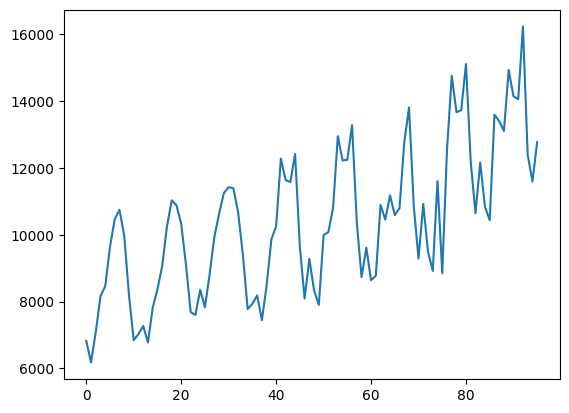

In [4]:
miles_df['MilesMM'].plot()

In [5]:
# Homework

# what are the four components of time series?

In [8]:
import seaborn as sns

<Axes: ylabel='MilesMM'>

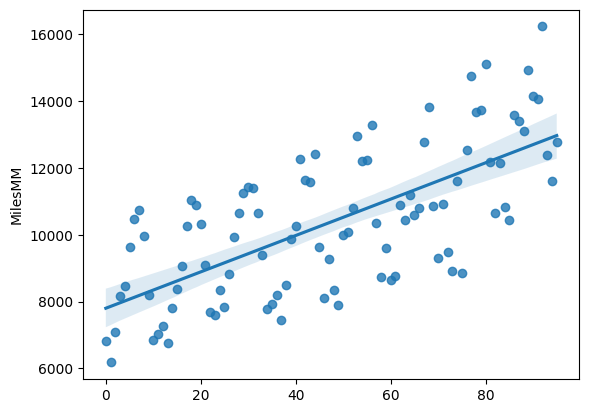

In [9]:
sns.regplot(x=miles_df.index.values, y=miles_df['MilesMM'])

In [10]:
# Removing Seasonality

miles_df['year'] = miles_df['Month'].dt.year

In [11]:
miles_df.head()

,Month,MilesMM,year
0,1963-01-01,6827,1963
1,1963-02-01,6178,1963
2,1963-03-01,7084,1963
3,1963-04-01,8162,1963
4,1963-05-01,8462,1963


In [12]:
miles_df.groupby('year')['MilesMM'].mean()

year
1963     8300.250000
1964     8849.333333
1965     9619.250000
1966     9929.500000
1967    10542.916667
1968    10747.916667
1969    11972.000000
1970    13124.750000
Name: MilesMM, dtype: float64

<Axes: xlabel='year'>

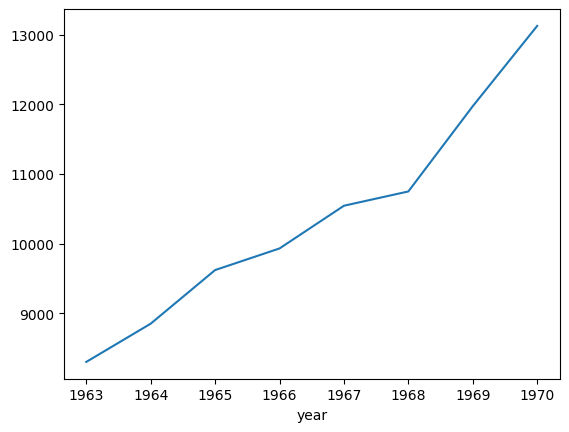

In [13]:
miles_df.groupby('year')['MilesMM'].mean().plot()

### Creating Lag plots

In [14]:
miles_df['lag1'] = miles_df['MilesMM'].shift(1)

In [15]:
miles_df.head()

,Month,MilesMM,year,lag1
0,1963-01-01,6827,1963,NaN
1,1963-02-01,6178,1963,6827.0
2,1963-03-01,7084,1963,6178.0
3,1963-04-01,8162,1963,7084.0
4,1963-05-01,8462,1963,8162.0


<Axes: xlabel='lag1', ylabel='MilesMM'>

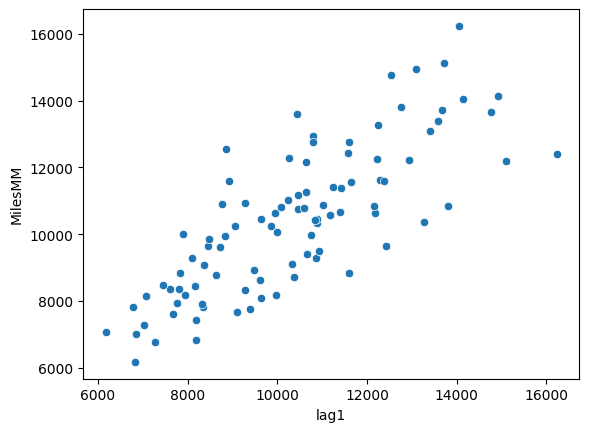

In [16]:
sns.scatterplot(x=miles_df['lag1'], y=miles_df['MilesMM'])

In [18]:
from pandas.plotting import lag_plot

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

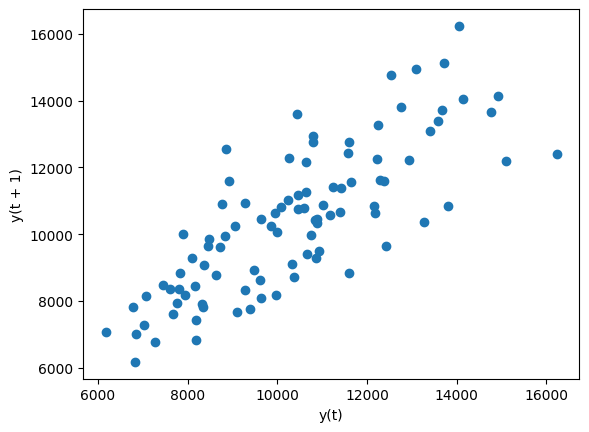

In [20]:
lag_plot(miles_df['MilesMM'])

# X MilesMM
# y Lag

### Autocorrelatioin Plots

In [21]:
from pandas.plotting import autocorrelation_plot

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

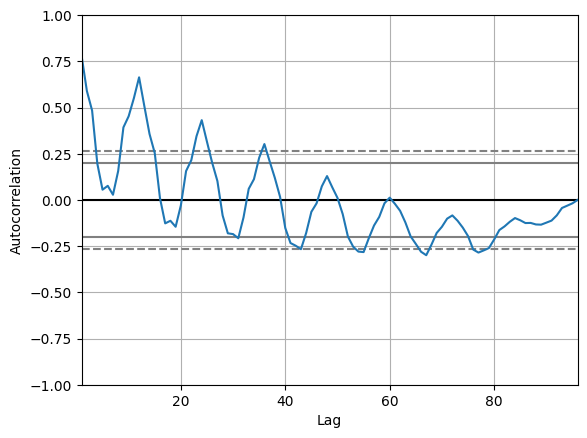

In [25]:
autocorrelation_plot(miles_df['MilesMM'])

In [28]:
import numpy as np
import pandas as pd
np.arange(1, 101)

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [30]:
1*1.5
2*1.5

3.0